<h2>About Dataset</h2>
<h3>About Yulu</h3>
<p>Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.
</p>

<h3>How you can help here?</h3>

<p> The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands?

Concepts Used:

Bi-Variate Analysis 2-sample t-test: testing for difference across populations ANNOVA Chi-square

How to begin:

Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset

Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)

Select an appropriate test to check whether:

Working Day has effect on number of electric cycles rented

No. of cycles rented similar or different in different seasons

No. of cycles rented similar or different in different weather

Weather is dependent on season (check between 2 predictor variable)

Set up Null Hypothesis (H0) State the alternate hypothesis (H1) Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)

Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary

Set a significance level (alpha) Calculate test Statistics. Decision to accept or reject null hypothesis. Inference from the analysis

</p>

In [105]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode, download_plotlyjs, plot 

In [106]:
data = pd.read_csv('yulu_bike_sharing_dataset.csv')

In [107]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [109]:
data.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [110]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

<AxesSubplot:xlabel='workingday', ylabel='count'>

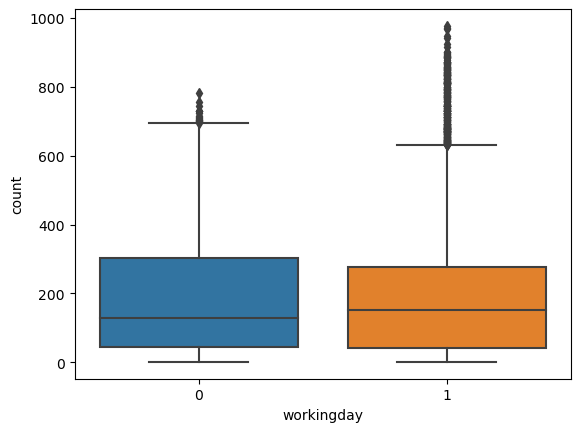

In [111]:
sns.boxplot(x='workingday', y='count', data=data)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='count'>

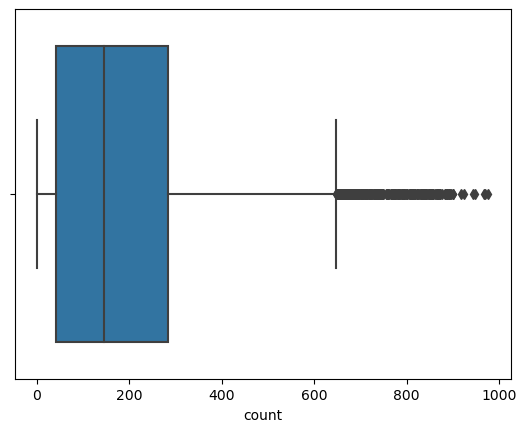

In [112]:
sns.boxplot(data['count'], data=data)

In [113]:
#removing outlier
q1 = data['count'].quantile(0.25)
q3 = data['count'].quantile(0.75)

IQR = q3 - q1
upper_fence = q3 + (1.5*IQR)
lower_fence = q1 - (1.5*IQR)

In [114]:
print('Interquantile range is:',IQR)
print('Upper Fence is:',upper_fence)
print('Lower Fence is:', lower_fence)

Interquantile range is: 242.0
Upper Fence is: 647.0
Lower Fence is: -321.0


In [115]:
data = data[(data['count']>lower_fence) & (data['count']<upper_fence)]

In [116]:
data.shape

(10583, 12)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='count'>

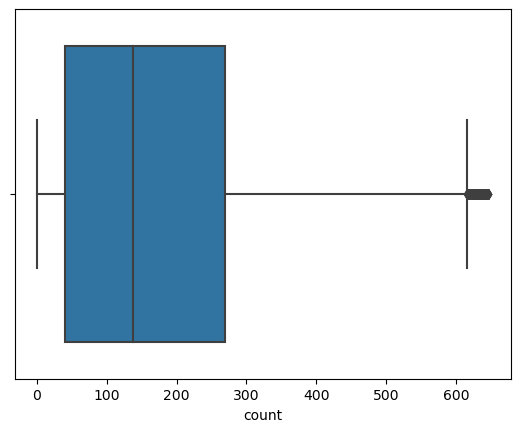

In [117]:
sns.boxplot(data['count'])

In [118]:
#Changing "datetime" column to "datetime" data type from "object type"¶
#By extracting "hour", "month", "year" data from "datetime" column, we will be able to 
#analyze various information such as during which months, hours- the demand is maximum

data['datetime'] = pd.to_datetime(data['datetime'])

In [119]:
data['hour'] = data['datetime'].dt.hour

In [120]:
data['month'] = data['datetime'].dt.month

In [121]:
data['year'] = data['datetime'].dt.year

In [122]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,2011


In [123]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
month         0
year          0
dtype: int64

<AxesSubplot:>

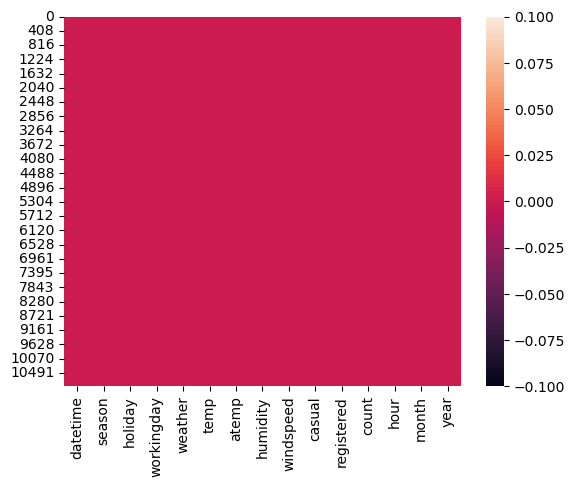

In [124]:
#checking null values using seaborn
sns.heatmap(data.isnull())  #We can see there is no null value present in our dataset, so we can move forward for further analysis

In [125]:
#Correlation between variables
round(data.corr(),2) #rounding-off correlation between our variables

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
season,1.00,0.03,-0.01,0.01,0.26,0.27,0.19,-0.15,0.10,0.17,0.17,-0.01,0.97,-0.01
holiday,0.03,1.00,-0.25,-0.01,0.00,-0.00,0.00,0.01,0.05,-0.01,0.01,0.00,0.00,0.02
workingday,-0.01,-0.25,1.00,0.03,0.02,0.02,-0.01,0.02,-0.33,0.09,-0.02,-0.00,-0.01,-0.01
weather,0.01,-0.01,0.03,1.00,-0.05,-0.05,0.41,0.01,-0.13,-0.11,-0.13,-0.02,0.01,-0.01
temp,0.26,0.00,0.02,-0.05,1.00,0.99,-0.05,-0.02,0.47,0.30,0.39,0.13,0.26,0.04
atemp,0.27,-0.00,0.02,-0.05,0.99,1.00,-0.03,-0.06,0.46,0.30,0.38,0.13,0.27,0.04
humidity,0.19,0.00,-0.01,0.41,-0.05,-0.03,1.00,-0.32,-0.34,-0.27,-0.32,-0.27,0.21,-0.07
windspeed,-0.15,0.01,0.02,0.01,-0.02,-0.06,-0.32,1.00,0.09,0.10,0.11,0.15,-0.15,-0.02
casual,0.10,0.05,-0.33,-0.13,0.47,0.46,-0.34,0.09,1.00,0.51,0.72,0.30,0.10,0.11
registered,0.17,-0.01,0.09,-0.11,0.30,0.30,-0.27,0.10,0.51,1.00,0.97,0.41,0.17,0.21


<AxesSubplot:>

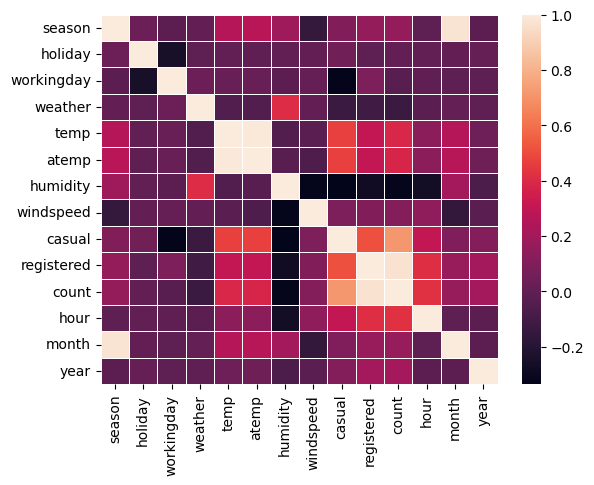

In [126]:
sns.heatmap(data.corr(), linewidths=0.5)

In [127]:
#Data Visualiztion
px.pie(data,names='season')  # 1 - Spring, 2 - summer, 3 - rainfall 4 - winter

In [131]:
px.pie(data, names='holiday') #1 = holiday, 0 = non-holiday

In [129]:
px.pie(data, names='workingday') #1 = working day, 0 = non-working day

In [132]:
workday = data[data['workingday']==1]

In [134]:
workday.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
47,2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5,0,1,2011
48,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2,1,1,2011
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1,4,1,2011
50,2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3,5,1,2011
51,2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30,6,1,2011


In [136]:
non_workday = data[data['workingday']==0]

In [138]:
non_workday.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,2011


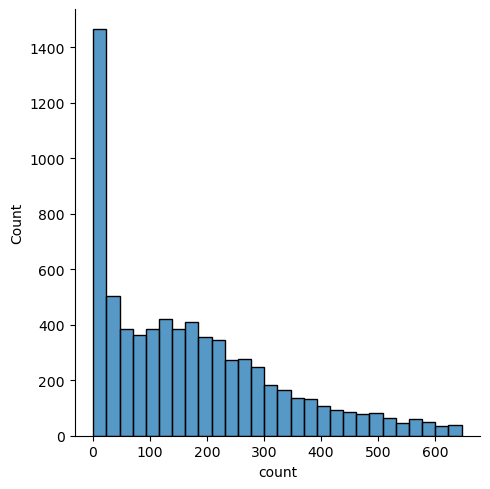

In [139]:
sns.displot(workday, x='count')

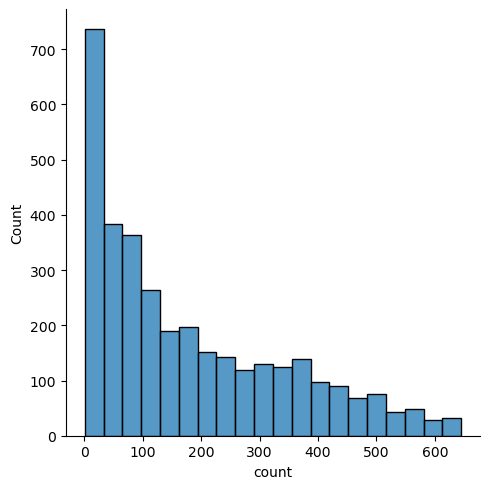

In [140]:
sns.displot(non_workday, x='count')